In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names ## Here we got the 4 feature of the iris

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
## appending the target into the DF
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris.target_names ## 0 - Setosa, 1 - Versicolor, 2 - Virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df[df['target']==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
df[df['target']==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [9]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
df[45:50]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa


In [11]:
from matplotlib import pyplot as plt

In [12]:
%matplotlib inline

In [13]:
## lets create 3 DF
df0 = df[df['target']==0]
df1 = df[df['target']==1]
df2 = df[df['target']==2]

In [14]:
df0.head(1),df1.head(1),df2.head(1)

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                5.1               3.5                1.4               0.2   
 
    target flower_name  
 0       0      setosa  ,
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 50                7.0               3.2                4.7               1.4   
 
     target flower_name  
 50       1  versicolor  ,
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 100                6.3               3.3                6.0               2.5   
 
      target flower_name  
 100       2   virginica  )

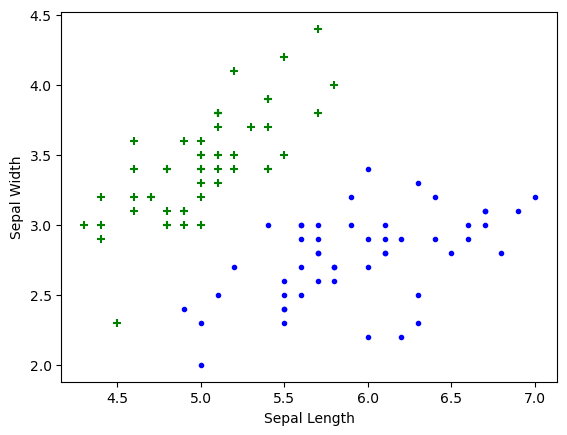

In [15]:
## lets draw a scatter plot
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='blue', marker='.')

## We can see clear classification

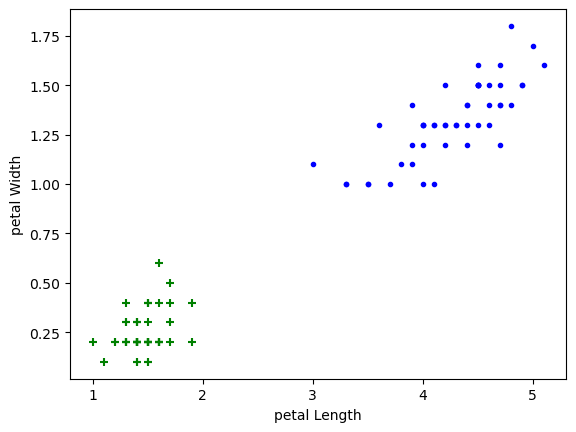

In [16]:
## plotting for petal

plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='blue', marker='.')

## Train Test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
## removing the target column
X = df.drop(['target','flower_name'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y = df.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [21]:
len(X_train)

120

In [22]:
len(X_test)

30

In [23]:
from sklearn.svm import SVC
model = SVC()

In [24]:
model.fit(X_train, y_train)

SVC()

In [25]:
model.score(X_test, y_test) ## we got 96% of accuracy

0.9666666666666667

In [26]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\Users\Ajith\anaconda3\envs\geo_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

# Tuning the parameters

### Regularization

In [27]:
## modifyig the c parameter that is Regularization
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [28]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

### Gamma

In [29]:
## modifying the Gamma variable
model_g = SVC(gamma=10) ## Increase in Gamma reduce the score
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

### Kernel

In [30]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
model_linear_kernal.score(X_test, y_test)

0.9666666666666667